<a href="https://colab.research.google.com/github/saivignesharra/assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("/content/breast-cancer.csv")

# Check for missing values
print(data.isnull().sum())

# Fill missing values with mean
df1=data.fillna(data['radius+AF8-mean'].mean())
print(df1.isnull().sum())

# Encode categorical features
encoder = LabelEncoder()
df1['diagnosis'] = encoder.fit_transform(df1['diagnosis'])

# Scale numerical features
scaler = StandardScaler()
df1[df1.columns[:-1]] = scaler.fit_transform(df1[df1.columns[:-1]])

print(df1.head())


id                                 0
diagnosis                          0
radius+AF8-mean                    1
texture+AF8-mean                   0
perimeter+AF8-mean                 0
area+AF8-mean                      0
smoothness+AF8-mean                0
compactness+AF8-mean               0
concavity+AF8-mean                 0
concave points+AF8-mean            0
symmetry+AF8-mean                  0
fractal+AF8-dimension+AF8-mean     0
radius+AF8-se                      0
texture+AF8-se                     0
perimeter+AF8-se                   0
area+AF8-se                        0
smoothness+AF8-se                  0
compactness+AF8-se                 0
concavity+AF8-se                   0
concave points+AF8-se              0
symmetry+AF8-se                    0
fractal+AF8-dimension+AF8-se       0
radius+AF8-worst                   0
texture+AF8-worst                  0
perimeter+AF8-worst                0
area+AF8-worst                     0
smoothness+AF8-worst               0
c

Data visualisation

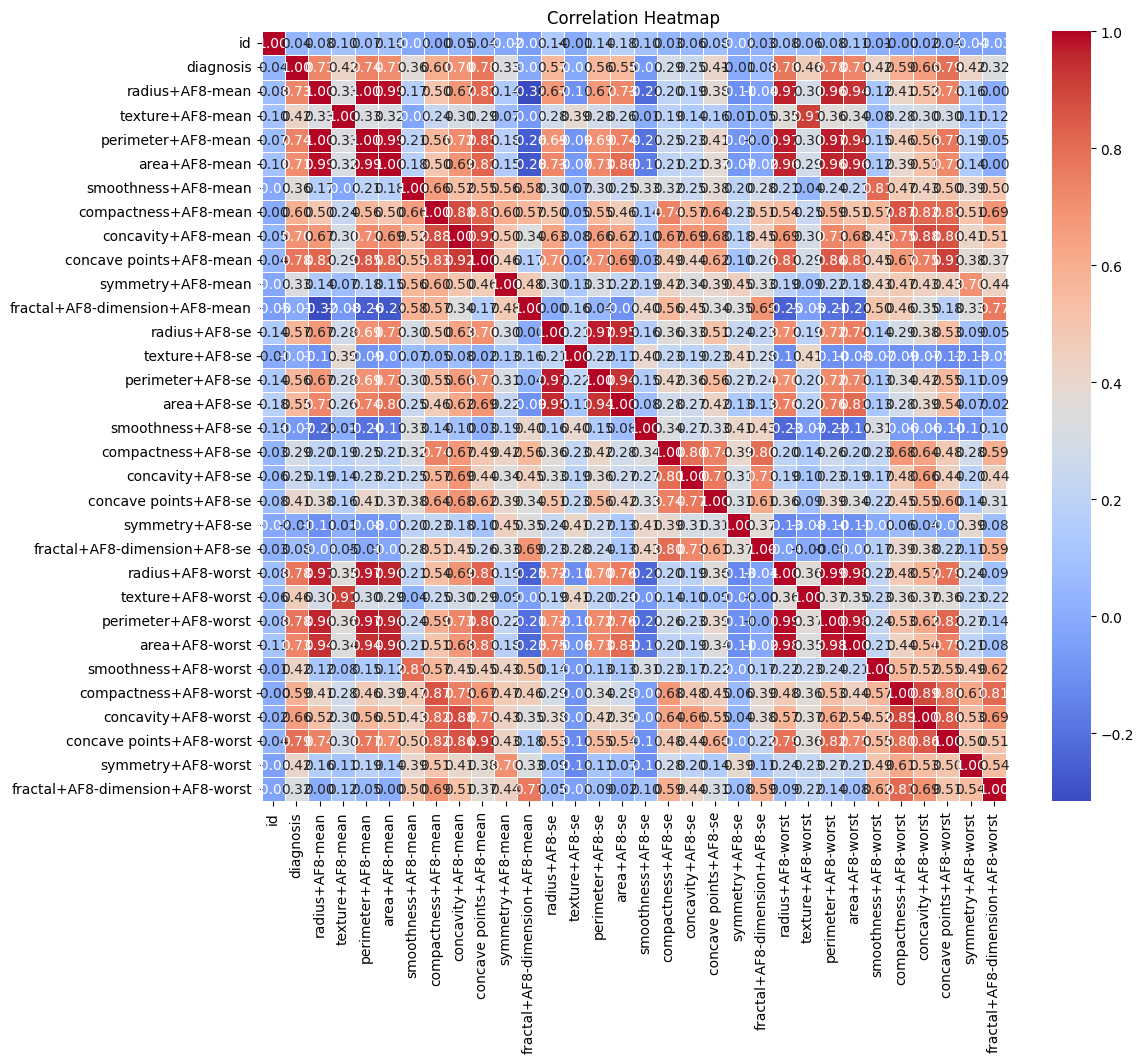

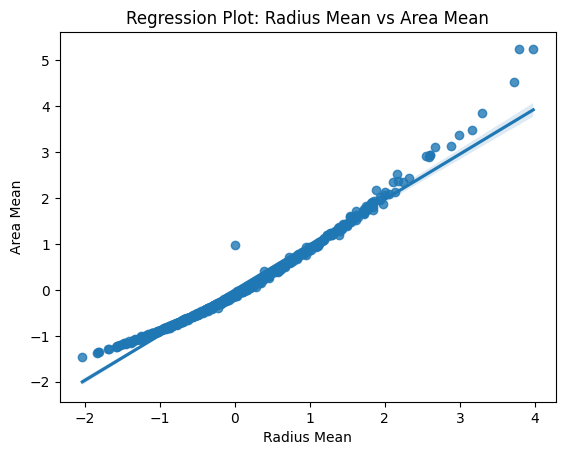

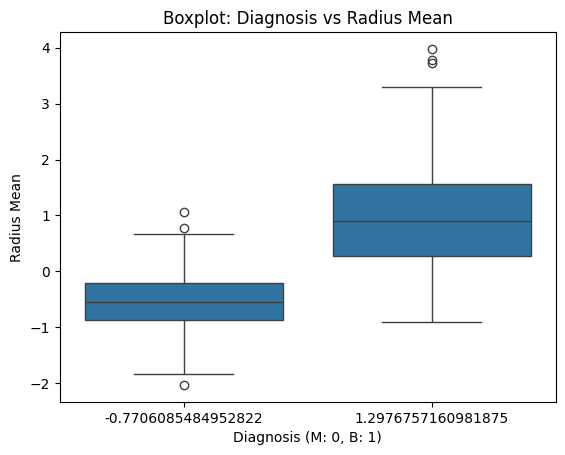

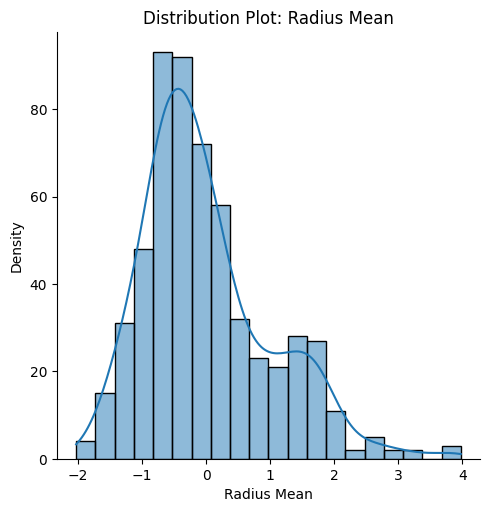

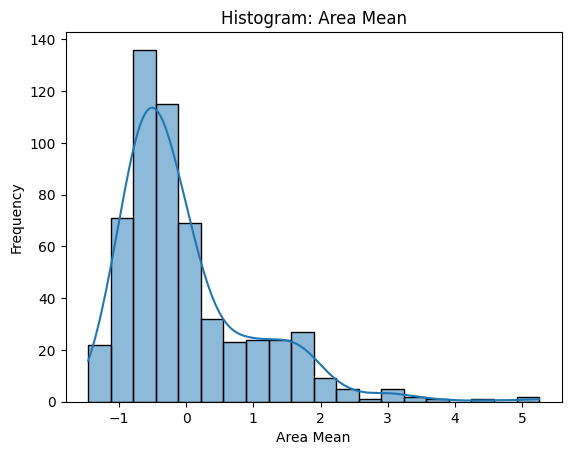

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Regression plot
sns.regplot(x='radius+AF8-mean', y='area+AF8-mean', data=df1)
plt.title('Regression Plot: Radius Mean vs Area Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()

# Boxplot
sns.boxplot(x='diagnosis', y='radius+AF8-mean', data=df1)
plt.title('Boxplot: Diagnosis vs Radius Mean')
plt.xlabel('Diagnosis (M: 0, B: 1)')
plt.ylabel('Radius Mean')
plt.show()

# Distribution plots
sns.displot(df1['radius+AF8-mean'], kde=True, bins=20)
plt.title('Distribution Plot: Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.show()

# Histogram
sns.histplot(df1['area+AF8-mean'], kde=True, bins=20)
plt.title('Histogram: Area Mean')
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.show()

SVM and RandomForest model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Split the data into features and target variable
X = df1.drop(columns=['diagnosis'])
y = df1['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y = le.fit_transform(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_rmse = sqrt(mean_squared_error(y_test, svm_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_rmse = sqrt(mean_squared_error(y_test, rf_pred))

# Print the results
print("SVM Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("RMSE:", svm_rmse)

print("\nRandom Forest Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("RMSE:", rf_rmse)

SVM Accuracy: 0.9824561403508771
SVM Performance:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904763
RMSE: 0.13245323570650439

Random Forest Performance:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
RMSE: 0.1873171623163388
